In [1]:
import pandas as pd
import numpy as np
from scipy.interpolate import InterpolatedUnivariateSpline

directory = "../../data/pxd025560/"
file = directory+"pxd025560.report.tsv"

In [2]:
df = pd.read_csv(file, sep = "\t")
df = df.sort_values(by = "PEP")


In [3]:
# calculate PEP from Q.Value
x = df.PEP.reset_index().drop("index", axis = 1)
y = df["Q.Value"].reset_index().drop("index", axis = 1)*x.values
f = InterpolatedUnivariateSpline(x, y, k=1)
dfdx = f.derivative()
deriv = pd.DataFrame(dfdx(x), columns = ["PEP_calculated"])
pep_calc = deriv.rename({})

In [4]:
# Calculate q-value from PEP
PEP = df["PEP"].reset_index().drop("index", axis = 1).reset_index()
PEP_sum = PEP.cumsum()
PEP["Q_calculated"] = PEP_sum.PEP / (PEP_sum.index+1)
df.reset_index(inplace = True)
res = pd.concat([df["Protein.Ids"], df["Stripped.Sequence"], PEP, pep_calc, df.iloc[:,df.columns.str.contains("Q.Value")]], axis = 1)


In [5]:
res

Protein.Ids     Stripped.Sequence    index       PEP  Q_calculated  \
0              Q9UKK3      QLLGLQPISTVSPLHR        0  0.000000      0.000000   
1              P61221  LPIPRPGEVLGLVGTNGIGK        1  0.000000      0.000000   
2              Q14204      ALEHAFQLEHIMDLTR        2  0.000000      0.000000   
3              Q9P0M9      MEGHYVHAGNIIATQR        3  0.000000      0.000000   
4              P01024       RIPIEDGSGEVVLSR        4  0.000000      0.000000   
...               ...                   ...      ...       ...           ...   
1322367        Q9NPF5   DILELGGPEGDAASGTISK  1322367  0.563934      0.028895   
1322368        Q96JH7       TIQQNITEQASVMQK  1322368  0.564044      0.028895   
1322369  Random_19301      QPPCTPSRQPPCTPSR  1322369  0.564333      0.028896   
1322370        Q14204       TPVIDADKPVSSQLR  1322370  0.564506      0.028896   
1322371        Q99735      YKVTPPAVTGSPEFER  1322371  0.564799      0.028896   

         PEP_calculated       Q.Value  Global.Q.Value  Protein.Q.Value  \
0                   NaN  1.000000e-09        0.001919         0.000397   
1                   NaN  1.000000e-09        0.001919         0.000486   
2                   NaN  1.000000e-09        0.003680         0.000545   
3                   NaN  1.000000e-09        0.004307         0.013588   
4                   NaN  1.000000e-09        0.001919         0.000456   
...                 ...           ...             ...              ...   
1322367        0.009998  9.998306e-03        0.004102         0.000397   
1322368        0.009998  9.998306e-03        0.006978         0.000397   
1322369        0.009998  9.998306e-03        0.062165         1.000000   
1322370        0.009998  9.998306e-03        0.003976         0.000397   
1322371        0.009998  9.998306e-03        0.217588         0.040941   

         PG.Q.Value  Global.PG.Q.Value  GG.Q.Value  Translated.Q.Value  \
0          0.000550           0.000583    0.000550                   0   
1          0.000743           0.000558    0.000744                   0   
2          0.000627           0.000558    0.000627                   0   
3          0.026360           0.000949    0.015028                   0   
4          0.000667           0.000558    0.000668                   0   
...             ...                ...         ...                 ...   
1322367    0.000944           0.000583    0.000913                   0   
1322368    0.000550           0.000558    0.000550                   0   
1322369    0.029397           1.000000    1.000000                   0   
1322370    0.000550           0.000558    0.000550                   0   
1322371    0.064722           1.000000    0.041233                   0   

         Lib.Q.Value  Lib.PG.Q.Value  
0           0.000215        0.001397  
1           0.000176        0.001142  
2           0.000215        0.001397  
3           0.001471        0.004168  
4           0.000215        0.001397  
...              ...             ...  
1322367     0.000294        0.001321  
1322368     0.001309        0.000587  
1322369     0.003276        0.006839  
1322370     0.000116        0.000646  
1322371     0.009144        0.006620  

[1322372 rows x 15 columns]

In [6]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [7]:
round(res["Q_calculated"].corr(res["Q.Value"]), 2)

round(res["Q_calculated"].corr(res["Q.Value"], method = "spearman"), 2)

0.91

Text(0.5, 1.0, 'Pearson 0.26; Spearman 0.0')

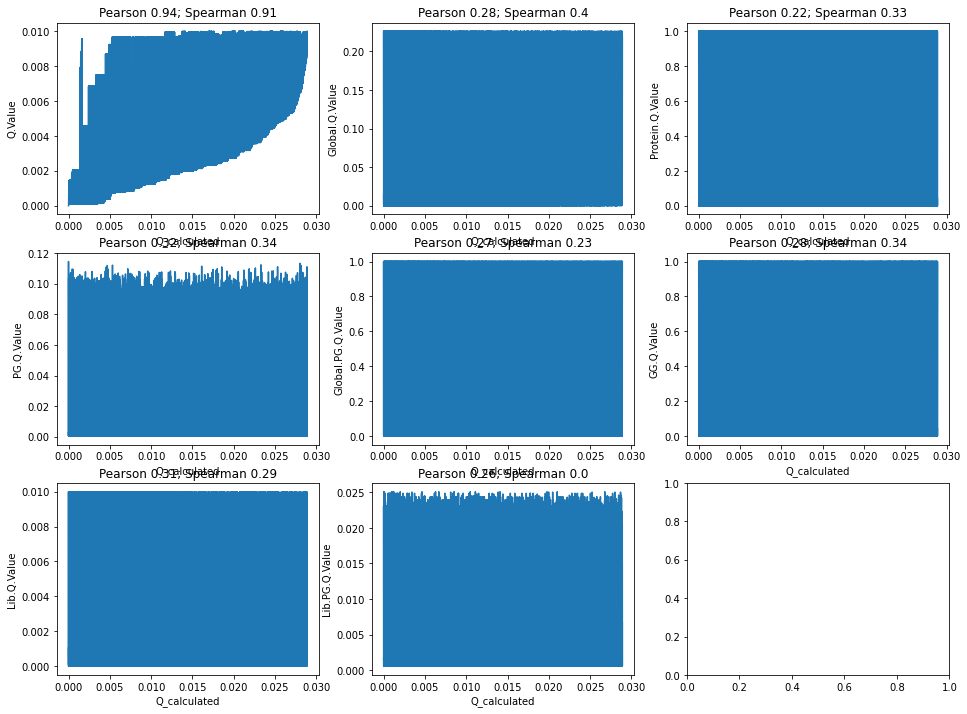

In [10]:
fig2 = plt.figure(figsize=(16, 12))
spec2 = gridspec.GridSpec(ncols=3, nrows=3, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[0, 1])
f2_ax3 = fig2.add_subplot(spec2[0, 2])
f2_ax4 = fig2.add_subplot(spec2[1, 0])
f2_ax5 = fig2.add_subplot(spec2[1, 1])
f2_ax6 = fig2.add_subplot(spec2[1, 2])
f2_ax7 = fig2.add_subplot(spec2[2, 0])
f2_ax8 = fig2.add_subplot(spec2[2, 1])
f2_ax9 = fig2.add_subplot(spec2[2, 2])

sns.lineplot(data=res, x="Q_calculated", y="Q.Value", ax = f2_ax1).set_title(f'Pearson {round(res["Q_calculated"].corr(res["Q.Value"]), 2)}; Spearman {round(res["Q_calculated"].corr(res["Q.Value"], method = "spearman"), 2)}')
sns.lineplot(data=res, x="Q_calculated", y="Global.Q.Value", ax = f2_ax2).set_title(f'Pearson {round(res["Q_calculated"].corr(res["Global.Q.Value"]), 2)}; Spearman {round(res["Q_calculated"].corr(res["Global.Q.Value"], method = "spearman"), 2)}')
sns.lineplot(data=res, x="Q_calculated", y="Protein.Q.Value", ax = f2_ax3).set_title(f'Pearson {round(res["Q_calculated"].corr(res["Protein.Q.Value"]), 2)}; Spearman {round(res["Q_calculated"].corr(res["Protein.Q.Value"], method = "spearman"), 2)}')
sns.lineplot(data=res, x="Q_calculated", y="PG.Q.Value", ax = f2_ax4).set_title(f'Pearson {round(res["Q_calculated"].corr(res["PG.Q.Value"]), 2)}; Spearman {round(res["Q_calculated"].corr(res["PG.Q.Value"], method = "spearman"), 2)}')
sns.lineplot(data=res, x="Q_calculated", y="Global.PG.Q.Value", ax = f2_ax5).set_title(f'Pearson {round(res["Q_calculated"].corr(res["Global.PG.Q.Value"]), 2)}; Spearman {round(res["Q_calculated"].corr(res["Global.PG.Q.Value"], method = "spearman"), 2)}')
sns.lineplot(data=res, x="Q_calculated", y="GG.Q.Value", ax = f2_ax6).set_title(f'Pearson {round(res["Q_calculated"].corr(res["GG.Q.Value"]), 2)}; Spearman {round(res["Q_calculated"].corr(res["GG.Q.Value"], method = "spearman"), 2)}')
sns.lineplot(data=res, x="Q_calculated", y="Lib.Q.Value", ax = f2_ax7).set_title(f'Pearson {round(res["Q_calculated"].corr(res["Lib.Q.Value"]), 2)}; Spearman {round(res["Q_calculated"].corr(res["Lib.Q.Value"], method = "spearman"), 2)}')
sns.lineplot(data=res, x="Q_calculated", y="Lib.PG.Q.Value", ax = f2_ax8).set_title(f'Pearson {round(res["Q_calculated"].corr(res["Lib.PG.Q.Value"]), 2)}; Spearman {round(res["Q_calculated"].corr(res["Lib.PG.Q.Value"], method = "spearman"), 2)}')
#sns.lineplot(data=res, x="Q_calculated", y="Q.Value", ax = f2_ax9).set_title(f'Pearson {round(res["Q_calculated"].corr(res["Q.Value"]), 2)}; Spearman {round(res["Q_calculated"].corr(res["Q.Value"], method = "spearman"), 2)}')



